In [2]:
!pip install feel_it
!pip install lux
import numpy as np
import pandas as pd
from feel_it import EmotionClassifier, SentimentClassifier


def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

df = pd.read_table('/inferno.txt',header=None)
line_nums = list(df[0].str.extractall(r"(Inferno . Canto .{1,6})")[0].index)
for i in range(0,len(line_nums)):
    line_nums[i] = line_nums[i][0]
line_nums.append(len(df))

inferno = pd.DataFrame(index=[f"Canto-{x}" for x in range(1,35)], columns=["Lines"])
cantos = [f"Canto-{x}" for x in range(1,35)]



In [3]:
i = 1
for c in cantos:
    inferno.at[c, "Lines"] = list(df[0][line_nums[i-1]+1:line_nums[i]])
    i = i + 1

In [4]:
for c in cantos:
  new_list = []
  for i in range(0,len(inferno["Lines"][c])-1, 3):
    new_list.append(" ".join(inferno["Lines"][c][i:i+3]))
  inferno["Lines"][c] = new_list

In [5]:
inferno["Lines"]["Canto-1"]

['Nel mezzo del cammin di nostra vita mi ritrovai per una selva oscura, ché la diritta via era smarrita.',
 'Ahi quanto a dir qual era è cosa dura esta selva selvaggia e aspra e forte che nel pensier rinova la paura!',
 'Tant’ è amara che poco è più morte; ma per trattar del ben ch’i’ vi trovai, dirò de l’altre cose ch’i’ v’ho scorte.',
 'Io non so ben ridir com’ i’ v’intrai, tant’ era pien di sonno a quel punto che la verace via abbandonai.',
 'Ma poi ch’i’ fui al piè d’un colle giunto, là dove terminava quella valle che m’avea di paura il cor compunto,',
 'guardai in alto e vidi le sue spalle vestite già de’ raggi del pianeta che mena dritto altrui per ogne calle.',
 'Allor fu la paura un poco queta, che nel lago del cor m’era durata la notte ch’i’ passai con tanta pieta.',
 'E come quei che con lena affannata, uscito fuor del pelago a la riva, si volge a l’acqua perigliosa e guata,',
 'così l’animo mio, ch’ancor fuggiva, si volse a retro a rimirar lo passo che non lasciò già mai per

In [6]:
emotion_classifier = EmotionClassifier()

Downloading:   0%|          | 0.00/899 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [7]:
i = 1
for c in cantos:
    lines_canto = inferno["Lines"][c]
    canto_emotion = emotion_classifier.predict(lines_canto)
    inferno.at[c, "Lines"] = list(zip(lines_canto, canto_emotion))
    i = i + 1

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [9]:
colors = {"sadness": "b",
          "fear": "m",
          "anger": "r",
          "joy": "y"}

In [10]:
ring1 = inferno["Lines"]["Canto-4"]
ring2 = inferno["Lines"]["Canto-5"]
ring3 = inferno["Lines"]["Canto-6"]
ring4 = inferno["Lines"]["Canto-7"]
ring5 = inferno["Lines"]["Canto-8"] + inferno["Lines"]["Canto-9"]
ring6 = inferno["Lines"]["Canto-10"] + inferno["Lines"]["Canto-11"]
ring7 = inferno["Lines"]["Canto-12"] + inferno["Lines"]["Canto-13"] + inferno["Lines"]["Canto-14"] + inferno["Lines"]["Canto-15"] + inferno["Lines"]["Canto-16"] + inferno["Lines"]["Canto-17"]
ring8 = inferno["Lines"]["Canto-18"] + inferno["Lines"]["Canto-19"] + inferno["Lines"]["Canto-20"] + inferno["Lines"]["Canto-21"] + inferno["Lines"]["Canto-22"] + inferno["Lines"]["Canto-23"] + inferno["Lines"]["Canto-24"] + inferno["Lines"]["Canto-25"] + inferno["Lines"]["Canto-26"] + inferno["Lines"]["Canto-26"] + inferno["Lines"]["Canto-27"] + inferno["Lines"]["Canto-28"] + inferno["Lines"]["Canto-29"] + inferno["Lines"]["Canto-30"]
ring9 = inferno["Lines"]["Canto-32"] + inferno["Lines"]["Canto-33"] + inferno["Lines"]["Canto-34"]

In [59]:
def plot_emotions(rng, name, size):
  i = 1
  for ring in rng:
    alpha= 10
    beta = 10
    x = -alpha
    y = 0
    plt.subplot(3,3,i).set_title("%s" % name[i-1])  
    plt.box(False)
    for line in range(0, len(ring)):
      plt.plot(x, y, color=colors[ring[line][1]], marker="s", markersize=size)
      if x == -alpha:
        y = y + 1
      if y == beta:
        x = x + 1
      if x == alpha:
        y = y - 1
      if y == -beta:
        x = x-1
      
      if line == (3*alpha + 3*beta + (alpha-1)):
        alpha = alpha - 1
        beta = beta - 1
      plt.xticks([])
      plt.yticks([])
    if i == 3:
      red_patch = mpatches.Patch(color='red', label='Anger')
      blue_patch = mpatches.Patch(color='blue', label='Sadness')
      m_patch = mpatches.Patch(color='magenta', label='Fear')
      yellow_patch = mpatches.Patch(color='yellow', label='Joy')

      plt.legend(handles=[red_patch, blue_patch, m_patch, yellow_patch], loc='center left', bbox_to_anchor=(1, 0.5))
    if i == 4:
      plt.ylabel("Lines ->", fontsize=25)
    if i == 8:
      plt.xlabel("Lines ->", fontsize=25)
    i = i + 1
    plt.rcParams['figure.figsize'] = [25, 20]

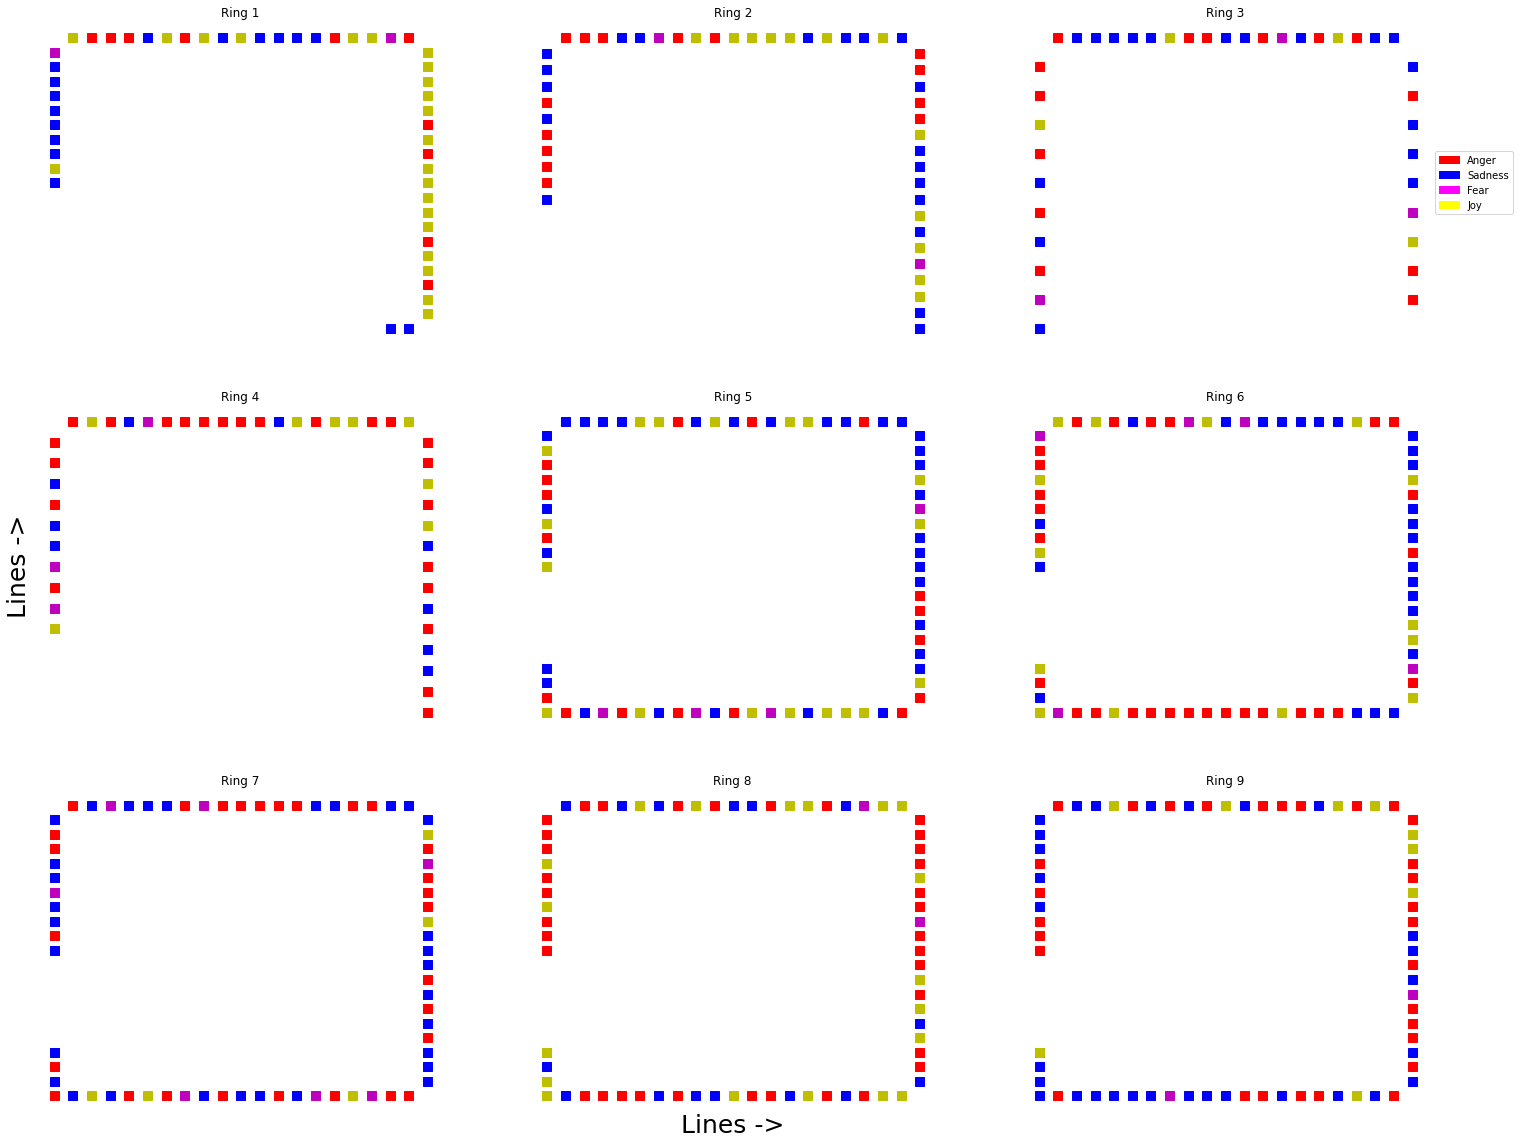

In [60]:
plot_emotions(rings, names, 9)

In [ ]:
def theme_analysis(ring_name):
  num_sad = len([ring_name[i][1] for i in range(0,len(ring_name)) if ring_name[i][1] == "sadness"])
  num_fear = len([ring_name[i][1] for i in range(0,len(ring_name)) if ring_name[i][1] == "fear"])
  num_anger = len([ring_name[i][1] for i in range(0,len(ring_name)) if ring_name[i][1] == "anger"])
  num_joy = len([ring_name[i][1] for i in range(0,len(ring_name)) if ring_name[i][1] == "joy"])
  return {"sad": num_sad, "fear": num_fear, "anger": num_anger, "joy": num_joy}

In [32]:
rings = [ring1, ring2, ring3, ring4, ring5, ring6, ring7, ring8, ring9]
names = ["Ring 1", "Ring 2", "Ring 3", "Ring 4", "Ring 5", "Ring 6", "Ring 7", "Ring 8", "Ring 9"]

In [ ]:
ring1_stats = theme_analysis(ring1)
ring2_stats = theme_analysis(ring2)

In [ ]:
themes = []
for r in rings:
  themes.append(theme_analysis(r))

<BarContainer object of 4 artists>

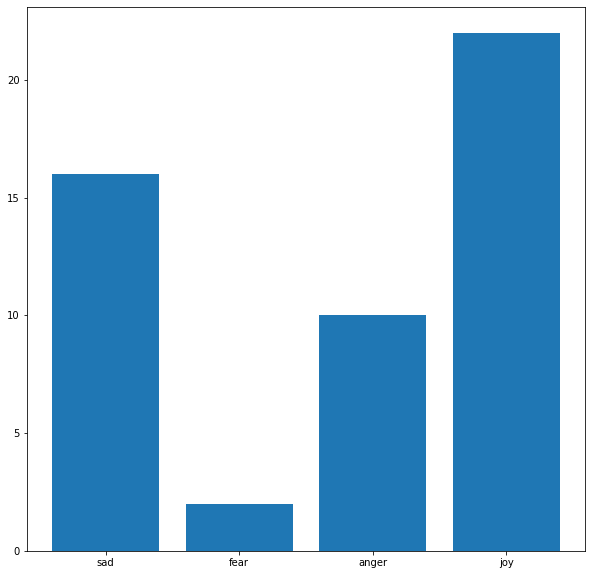

In [ ]:
keys = ring1_stats.keys()
values = ring1_stats.values()
plt.bar(keys, values)

In [ ]:
data = pd.DataFrame(themes)
data

,sad,fear,anger,joy
0,16,2,10,22
1,19,2,14,12
2,17,3,14,4
3,9,3,23,8
4,35,5,25,22
5,24,6,35,18
6,114,19,86,55
7,266,50,220,122
8,72,6,47,19
